In [2]:
from pathlib import Path
import pickle
import cv2

from descriptors import (
    compute_descriptors,
    hsv_histogram_concat,
    grayscale_histogram
)
from similarity import (
    compute_euclidean_distance,
    compute_manhattan_distance,
    compute_x2_distance,
    compute_histogram_intersection,
    compute_hellinger_distance,
)
from retrieval import retrieval
from metrics import mean_average_precision_K
from preprocess import preprocess_images, preprocess_images_laplacian
import matplotlib.pyplot as plt

In [7]:
pathlist = list(Path(Path(".") / "datasets" / "BBDD").glob("*.jpg"))[:5]
bbdd_images = {img_path.stem: cv2.imread(str(img_path)) for img_path in pathlist}

# METHOD 1

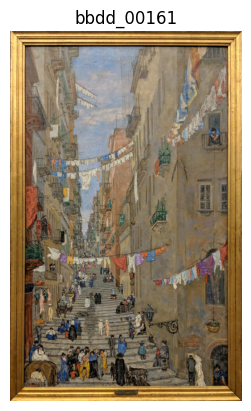

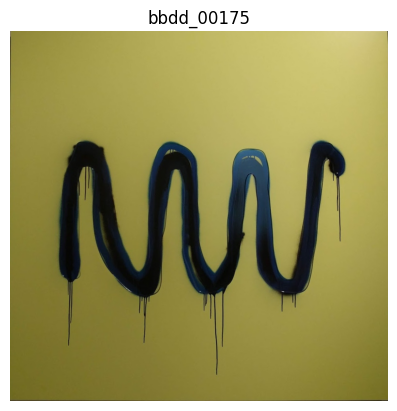

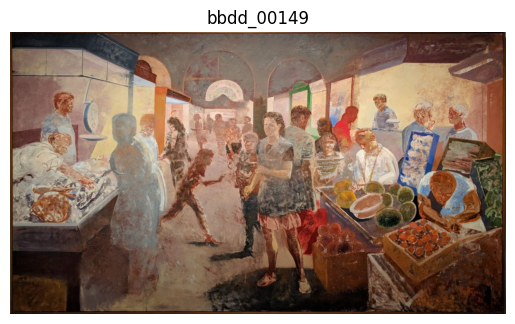

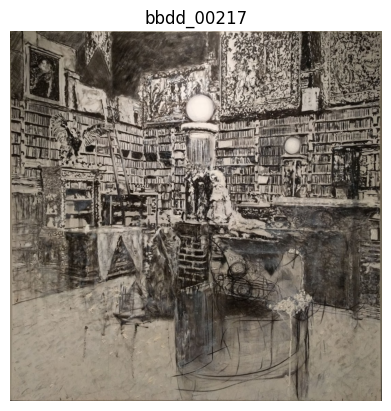

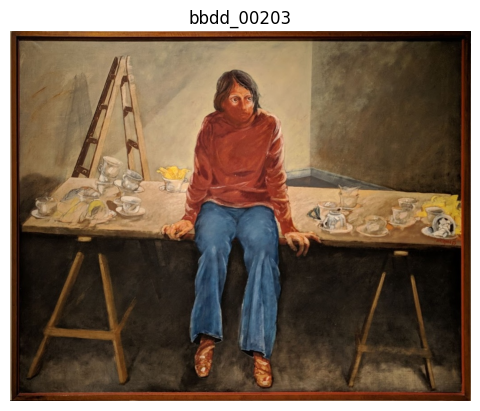

In [8]:
for img_name, img in bbdd_images.items():
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(img_name)
    plt.axis('off')
    plt.show()

In [9]:
bbdd_images = preprocess_images_laplacian(bbdd_images)

Preprocessing Images: 100%|██████████| 5/5 [00:00<00:00,  6.32it/s]


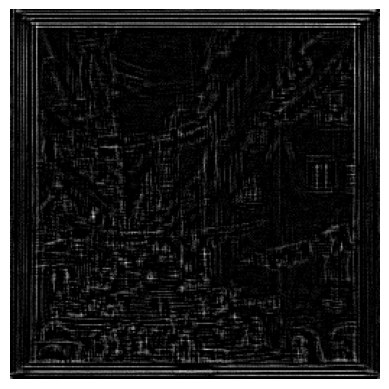

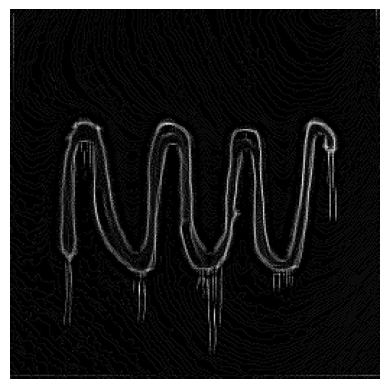

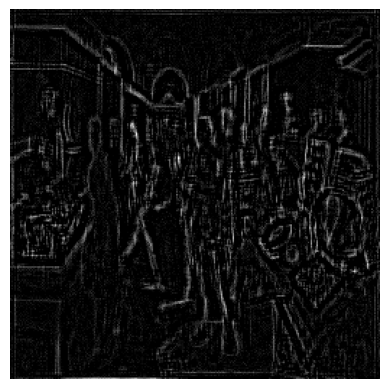

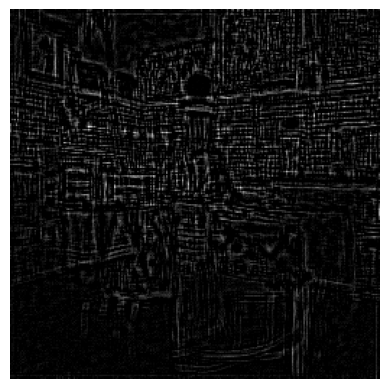

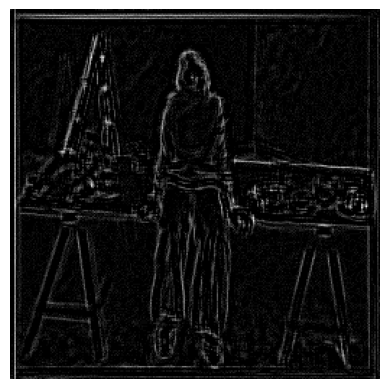

In [10]:
for img_name, img in bbdd_images.items():
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [11]:
bbdd_rgb_descriptors = compute_descriptors(
        "bbdd",
        grayscale_histogram,
        bbdd_images,
        use_grayscale=True,
        save_as_pkl=False,
        overwrite_pkl=True,
    )

Computing descriptors: 100%|██████████| 5/5 [00:00<00:00, 65.33it/s]


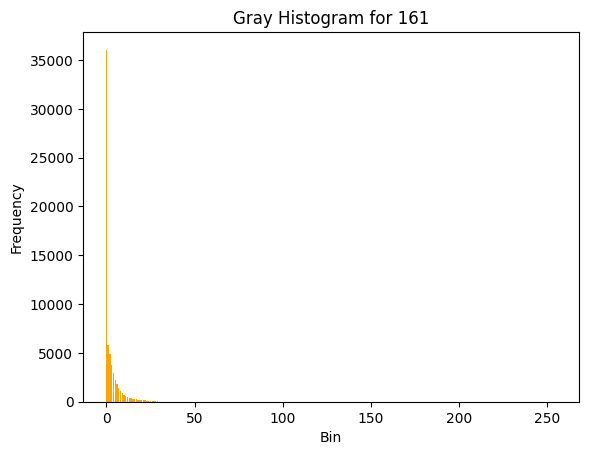

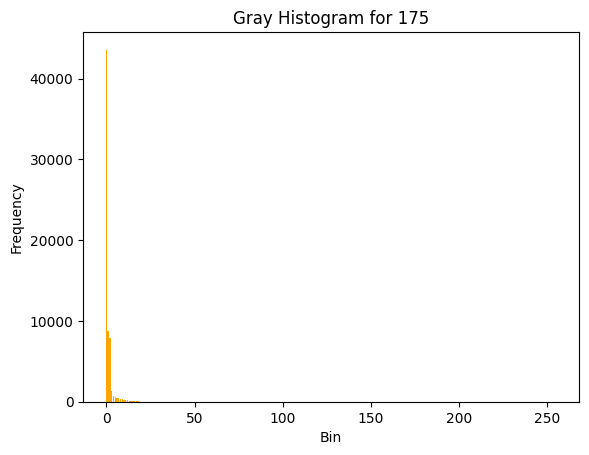

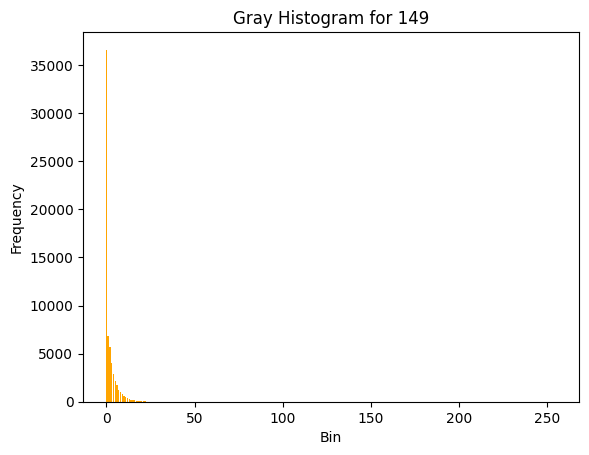

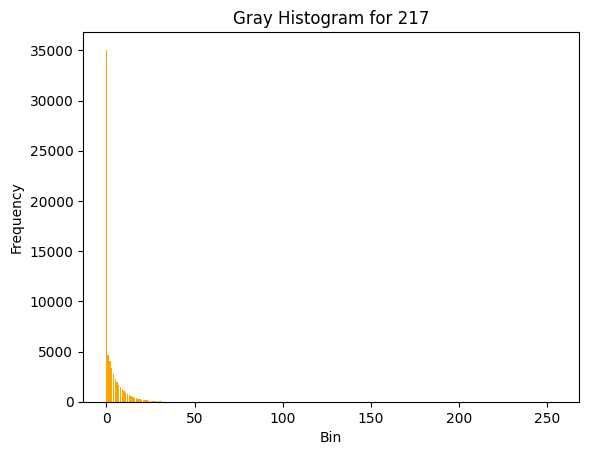

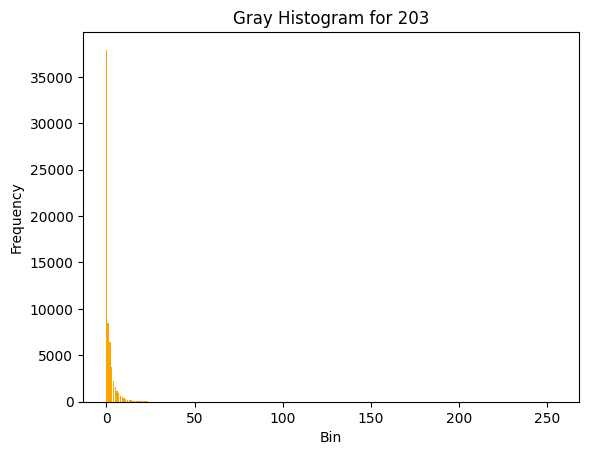

In [12]:
for img_index, hist in bbdd_rgb_descriptors.items():
    plt.bar(range(len(hist)), hist, color=['orange'])
    plt.title(f'Gray Histogram for {img_index}')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')
    plt.show()

Text(0.5, 1.0, 'mAP@5 for Different Similarity Metrics using HSV Histogram')

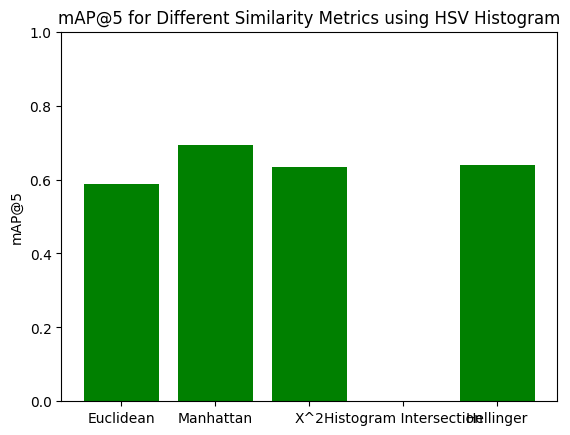

In [17]:
# Retrieval using hsv_histogram_concat and Euclidean Distance
# mAP@1: 0.5333333333333333
# Retrieval using hsv_histogram_concat and Manhattan Distance
# mAP@1: 0.6333333333333333
# Retrieval using hsv_histogram_concat and X^2 Distance
# mAP@1: 0.5666666666666667
# Retrieval using hsv_histogram_concat and Histogram Intersection
# mAP@1: 0.0
# Retrieval using hsv_histogram_concat and Hellinger Distance
# mAP@1: 0.6
# x = [0.5333333333333333, 0.6333333333333333, 0.5666666666666667, 0.0, 0.6]
# y = ['Euclidean', 'Manhattan', 'X^2', 'Histogram Intersection', 'Hellinger']
# plt.bar(y, x, color=['green'])
# plt.ylim(0, 1)
# plt.ylabel('mAP@1')
# plt.title('mAP@1 for Different Similarity Metrics using HSV Histogram')

# Retrieval using hsv_histogram_concat and Euclidean Distance
# mAP@K=5: 0.5866666666666666
# Retrieval using hsv_histogram_concat and Manhattan Distance
# mAP@K=5: 0.6933333333333332
# Retrieval using hsv_histogram_concat and X^2 Distance
# mAP@K=5: 0.6344444444444444
# Retrieval using hsv_histogram_concat and Histogram Intersection
# mAP@K=5: 0.0
# Retrieval using hsv_histogram_concat and Hellinger Distance
# mAP@K=5: 0.64
x = [0.5866666666666666, 0.6933333333333332, 0.6344444444444444, 0.0, 0.64]
y = ['Euclidean', 'Manhattan', 'X^2', 'Histogram Intersection', 'Hellinger']
plt.bar(y, x, color=['green'])
plt.ylim(0, 1)
plt.ylabel('mAP@5')
plt.title('mAP@5 for Different Similarity Metrics using HSV Histogram')